In [0]:
import math
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats
import scipy 
import matplotlib
import fbprophet
import pystan
#import quandl
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.linear_model import Perceptron
from sklearn.preprocessing import PolynomialFeatures




In [0]:
# pip install pandas_datareader 
import pandas_datareader as pdr
from pandas_datareader import data as web

Stock Analysis  Function


In [0]:
import datetime
def Stocks_Data():
  x = input("Enter the Stock name==>> ")
  start = datetime.datetime(2019,9,1)
  end = datetime.date.today()
  
  stock_data_list = web.DataReader(x, "yahoo", start, end)
  stock_data_list = pd.DataFrame(stock_data_list.iloc[:,[4,5]])
  print(stock_data_list)
  
#   Volume = pd.DataFrame (stock_data_list.iloc[:,[4]])
#   Adj_Close = pd.DataFrame(stock_data_list.iloc[:,[5]])
  
  
  High = np.max(stock_data_list)
  print("High=> ",High)
  print("---------------------------------")
  
  Low = np.min(stock_data_list)
  print("Low=> ",Low)
  print("---------------------------------")
  
  Mean = pd.DataFrame.mean(stock_data_list)
  print("Mean=> ",Mean)
  print("---------------------------------")
  
  Std = np.std(stock_data_list)
  print("Standard Deviation=> ",Std)
  print("---------------------------------")
  

  print("Distribution Analysis of Volume of the Given Stock")
  print(sns.scatterplot(x="Volume",y="Adj Close", data= stock_data_list, marker="^", color="blue"))
  
 
  

  
  


Enter the Stock name==>> MSFT
              Volume   Adj Close
Date                            
2019-09-03  18869300  136.039993
2019-09-04  17995900  137.630005
2019-09-05  26101800  140.050003
2019-09-06  20824500  139.100006
2019-09-09  25773900  137.520004
2019-09-10  28903400  136.080002
2019-09-11  24726100  136.119995
2019-09-12  27010000  137.520004
2019-09-13  23363100  137.320007
2019-09-16  16731400  136.330002
2019-09-17  17814200  137.389999
2019-09-18  23982100  138.520004
2019-09-19  35772100  141.070007
2019-09-20  39167300  139.440002
2019-09-23  17139300  139.139999
2019-09-24  29773200  137.380005
2019-09-25   9080250  137.949997
High=>  Volume       3.916730e+07
Adj Close    1.410700e+02
dtype: float64
---------------------------------
Low=>  Volume       9.080250e+06
Adj Close    1.360400e+02
dtype: float64
---------------------------------
Mean=>  Volume       2.370752e+07
Adj Close    1.379176e+02
dtype: float64
---------------------------------
Standard Deviatio

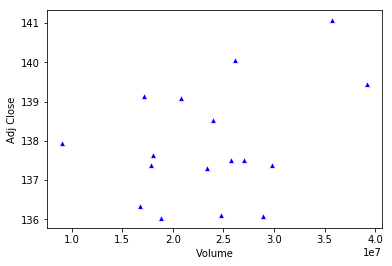

In [37]:

Stocks_Data()


SVM Classification using Gaussian Kernel 


[[4.05575000e+07 1.37601791e+02]
 [3.07916000e+07 1.36445633e+02]]
[[4.27496000e+07 1.31771210e+02]
 [3.26967000e+07 1.34242981e+02]
 [3.34145000e+07 1.34831024e+02]
 [2.74965000e+07 1.38429031e+02]
 [2.34667000e+07 1.37252960e+02]
 [2.04766000e+07 1.35339325e+02]
 [2.51546000e+07 1.38139999e+02]
 [3.25273000e+07 1.33979996e+02]
 [2.80744000e+07 1.33679993e+02]
 [2.44491000e+07 1.36130005e+02]
 [2.43557000e+07 1.38410004e+02]
 [2.11708000e+07 1.37259995e+02]
 [1.49703000e+07 1.38789993e+02]
 [1.86970000e+07 1.37779999e+02]
 [3.85086000e+07 1.33389999e+02]
 [2.03126000e+07 1.35449997e+02]
 [2.31021000e+07 1.35740005e+02]
 [1.73933000e+07 1.35559998e+02]
 [2.01687000e+07 1.38119995e+02]
 [2.39401000e+07 1.37860001e+02]
 [1.88693000e+07 1.36039993e+02]
 [1.79959000e+07 1.37630005e+02]
 [2.61018000e+07 1.40050003e+02]
 [2.08245000e+07 1.39100006e+02]
 [2.57739000e+07 1.37520004e+02]
 [2.89034000e+07 1.36080002e+02]
 [2.47261000e+07 1.36119995e+02]
 [2.70100000e+07 1.37520004e+02]
 [2.33631

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:38: RuntimeWarning:

invalid value encountered in log

/usr/local/lib/python3.6/dist-packages/matplotlib/colors.py:512: RuntimeWarning:

invalid value encountered in less



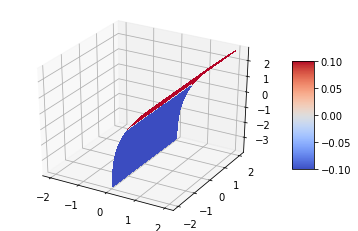

In [38]:
start_date = datetime.datetime(2019,8,1)
end_date = datetime.date.today()
stock_data = web.DataReader("MSFT", "yahoo", start_date, end_date)
stock_data = np.array(stock_data.iloc[:,[4,5]])
# print(stock_data)


# X = stock_data[-15:]
# y = stock_data[:15]

# separate data
split = 2
train,test = stock_data[:split,:],stock_data[split:,:]
print(train)
print(test)

C = 1.0  # SVM regularization parameter
models = (svm.SVC(kernel='linear', C=C),
          svm.LinearSVC(C=C, max_iter=10000),
          svm.SVC(kernel='rbf', gamma=0.7, C=C),
          svm.SVC(kernel='poly', degree=3, gamma='auto', C=C))
models = (clf.fit(X, y) for clf in models)

# print(models)
# print("Prediction Rate=> ")
# print(clf.predict(X))

# print("Classification Score=> ")
# print(clf.score(X))


from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

X = np.linspace(-2, 2, 100)
y = np.linspace(-2, 2, 100)
X, y = np.meshgrid(X, y)
z = np.log(X)/1+X
fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_surface(x, y, z, rstride=1, cstride=1, cmap=cm.coolwarm, linewidth=\
       0, antialiased=False)
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.savefig('surface.jpg')



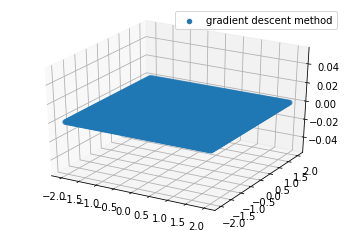

In [39]:
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.scatter(X, y, label='gradient descent method')
ax.legend()
plt.savefig('g-d.jpg')

[-35.008   9.   ] 148003135.50803244 1
[17000.7979042   252.3120128] 8.353653567034042e+18 2
[-1.96547499e+12  5.78056277e+07] 1.4923479411599924e+51 3
[3.03712425e+36 7.72618390e+23] 8.508445818346162e+147 4
[-1.12059239e+109  1.84482474e+072] inf 5


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning:

overflow encountered in square

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: RuntimeWarning:

overflow encountered in double_scalars

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: RuntimeWarning:

invalid value encountered in double_scalars



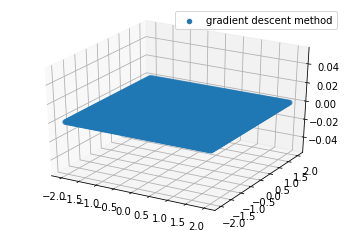

In [40]:
def func(x):
    return 100*np.square(np.square(x[0])-x[1])+np.square(x[0]-1)
    
# first order derivatives of the function
def dfunc(x):
    df1 = 400*x[0]*(np.square(x[0])-x[1])+2*(x[0]-1)
    df2 = -200*(np.square(x[0])-x[1])
    return np.array([df1, df2])
    
def grad(x, max_int):
    miter = 1
    step = .001/miter
    vals = []
    objectfs = []
    # you can customize your own condition of convergence, here we limit the number of iterations
    while miter <= max_int:
        vals.append(x)
        objectfs.append(func(x))
        temp = x-step*dfunc(x)
        if np.abs(func(temp)-func(x))>0.01:
            x = temp
        else:
            break
        print(x, func(x), miter)
        miter += 1
    return vals, objectfs, miter

start = [5, 5]
val, objectf, iters = grad(start, 50)

x = X
y = y
z = np.array(objectf)
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.scatter(X, y, label='gradient descent method')
ax.legend()
plt.savefig('g-d.jpg')

In [0]:
import numpy as np
import matplotlib.pyplot as plt

seg = (np.sqrt(5)-1)/2

def golden(f, lower, upper, merror):
    error = 1000
    vals = []
    vals.append((lower+upper)/2)
    objectf = []
    objectf.append(f((lower+upper)/2))
    # you can customize your own condition of convergence, here we limit the error term
    while error >= merror:
        temp1 = upper-seg*(upper-lower)
        temp2 = lower+seg*(upper-lower)
        if f(temp1)-f(temp2)>0:
            upper = temp2
        else:
            lower = temp1
        error = np.abs(f(temp1)-f(temp2))
        vals.append((lower+upper)/2)
        objectf.append(f((lower+upper)/2))
    return (temp2+temp1)/2, f((temp2+temp1)/2), vals, objectf

# # an example
# obj = lambda x: 4*x*x + (x+x*x)**2
# (ub, lb) = (3, 0)

# val, maxima, xs, ys = golden(obj, lb, ub, 0.003)

# print("The value and maximal is "+str(val)+", "+str(maxima))
# plt.plot(xs,ys,'ro')
# plt.title('Golden section method')
# plt.savefig('gsr.jpg')

The value of maximal is 149.99999149366704, 82892.1632018834


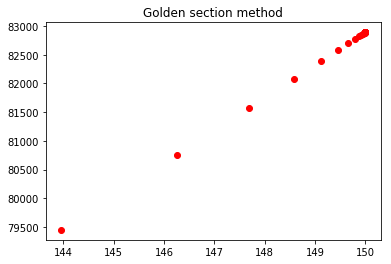

In [55]:
# an example
obj = lambda X: (X+137.91)**2

(ub, lb) = (150, 137.91)

val, maxima, xs, ys = golden(obj, lb, ub, 0.003)

print("The value of maximal is "+str(val)+", "+str(maxima))
plt.plot(xs,ys,'ro')
plt.title('Golden section method')
plt.savefig('gsr.jpg')

The value and maximal is 4.9995673243207195, 35.994808079056874


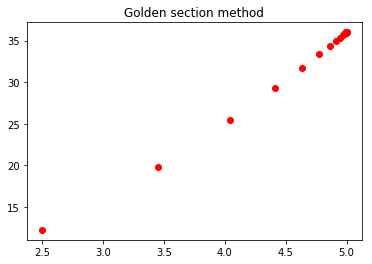

In [51]:


print("The value and maximal is "+str(val)+", "+str(maxima))
plt.plot(xs,ys,'ro')
plt.title('Golden section method')
plt.savefig('gsr.jpg')

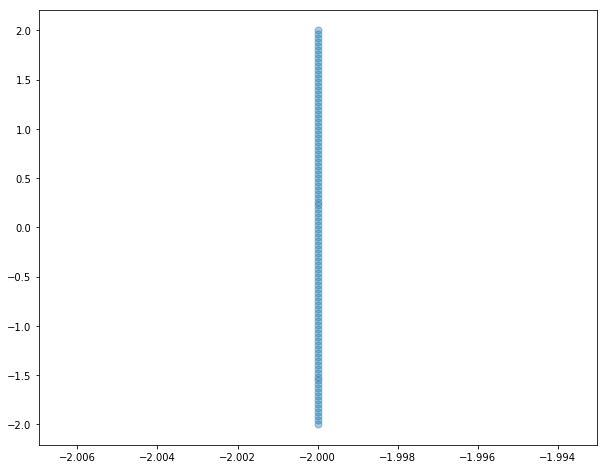

In [94]:
# import numpy as np
# import matplotlib.pyplot as plt
# %matplotlib inline

# # np.random.seed(12)
# num_observations = 30

# x1 = X[-10:]
# x2 = X[10:]

# simulated_separableish_features = np.vstack((x1, x2)).astype(np.float32)
# simulated_labels = np.hstack((np.zeros(num_observations),np.ones(num_observations)))

plt.figure(figsize=(10,8))
plt.scatter(X[:, 0],y[:, 1], alpha = .4, s =50)

In [0]:
def sigmoid(scores):
    return 1 / (1 + np.exp(-scores))


def log_likelihood(features, target, weights):
    scores = np.dot(features, weights)
    ll = np.sum( target*scores - np.log(1 + np.exp(scores)) )
    return ll
  
  
def logistic_regression(features, target, num_steps, learning_rate, add_intercept = False):
    if add_intercept:
        intercept = np.ones((features.shape[0], 1))
        features = np.hstack((intercept, features))
        
    weights = np.zeros(features.shape[1])
    
    for step in range(num_steps):
        scores = np.dot(features, weights)
        predictions = sigmoid(scores)

        # Update weights with gradient
        output_error_signal = target - predictions
        gradient = np.dot(features.T, output_error_signal)
        weights += learning_rate * gradient
        
        # Print log-likelihood every so often
        if step % 10000 == 0:
            print (log_likelihood(features, target, weights))
        
    return weights

In [95]:
from sklearn.linear_model import LogisticRegression
weights = logistic_regression(X, y,num_steps = 300000, learning_rate = 5e-5, add_intercept=True)
clf = LogisticRegression(fit_intercept=True, C = 1e15)
clf.fit(X[10:], y[-10:])

print (clf.intercept_, clf.coef_)
print (weights)

ValueError: ignored

In [0]:


start = datetime.datetime(2019,9,1)
end = datetime.date.today()
  
stock_dataset = web.DataReader("MSFT", "yahoo", start, end)
df = pd.DataFrame(stock_dataset.iloc[:,[4,5]])
# df = stock_dataset

X = stock_dataset[-15:]
y = stock_dataset[:15]
X = np.array(X)
y = np.array(y)
C,sigma = 10,0.001

In [0]:
def Kernel(x, y, sigma):
    return np.exp(-np.linalg.norm(x-y)**2 / ( (sigma ** 2)))
  
  

In [0]:
def Gram_Matrix(x):
    K = np.zeros((len(x),len(x)))
    for i in range(0, len(x)):
        for j in range(0, len(x)):
            K[i, j] = Kernel(x[i], x[j], sigma)
            
    return K

In [0]:
def H(x):
    mat = np.zeros((len(x), len(x)))
    mat[0:len(x), 0:len(x)] = Gram_Matrix(x) + np.eye(len(x))/2*C
    return mat

In [0]:
def alpha():
    p1 = np.dot(np.dot(np.linalg.inv(H_mat), e.T),k)
    p2 = np.dot(np.dot(np.linalg.inv(H_mat), e.T), e)
    p3 = (2-p1)/p2
    p3 = k + np.dot(p3, e)
    a = 0.5*np.dot(np.linalg.inv(H_mat),p3)
    return a

In [0]:
e = np.ones(len(X))
k = np.zeros((len(X)))

for j in range(0, len(X)):
    k[j] = Kernel(X[j], X[j], sigma)

H_mat = H(X)
al = alpha()

In [126]:
H(X)

array([[6., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 6., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 6., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 6., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 6., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 6., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 6., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 6., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 6., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 6., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 6., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 6., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 6., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 6., 0.],
       [0., 0., 0., 0., 0., 0., 0.

In [127]:
Gram_Matrix(X)

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0.

In [128]:
alpha()

array([0.06666667, 0.06666667, 0.06666667, 0.06666667, 0.06666667,
       0.06666667, 0.06666667, 0.06666667, 0.06666667, 0.06666667,
       0.06666667, 0.06666667, 0.06666667, 0.06666667, 0.06666667])

In [0]:
def R_square():
    p1 = 0
    p2 = 0
    total = 0
    for s in range(0, len(X)):
        k = Kernel(X[s], X[s], sigma)
        for j in range(0, len(X)):
            p1 = p1 + al[j]*Kernel(X[s], X[j], sigma)
            for l in range(0, len(X)):
                p2 = p2 + al[j]*al[l]*Kernel(X[j], X[l], sigma)
        total = total + (k - 2 * p1 + p2)
    final = total/len(X)
    return final

final = R_square()

In [130]:

final

0.4666666666666687

In [0]:
def classification(x):
    t_out = []
    t_in = []
    p = 0
    p1 = 0
    for z in range(0, len(x)):
        k = Kernel(x[z], x[z], sigma)    
        for j in range(0, len(X)):
            p = p + al[j]*Kernel(x, X[j], sigma)
            for l in range(0, len(X)):
                p1 = p1 + al[j]*al[l]*Kernel(X[j], X[l], sigma)
        d = k - 2*p + p1
        if d <= final:
            t_in.append(x[z])
        else:
            t_out.append(x[z])

    return t_out, t_in

t_out, t_in = classification(X)

In [132]:
t_out,t_in

([array([1.40380005e+02, 1.38759995e+02, 1.39110001e+02, 1.40050003e+02,
         2.61018000e+07, 1.40050003e+02]),
  array([1.40179993e+02, 1.38199997e+02, 1.40029999e+02, 1.39100006e+02,
         2.08245000e+07, 1.39100006e+02]),
  array([1.39750000e+02, 1.36460007e+02, 1.39589996e+02, 1.37520004e+02,
         2.57739000e+07, 1.37520004e+02]),
  array([1.36889999e+02, 1.34509995e+02, 1.36800003e+02, 1.36080002e+02,
         2.89034000e+07, 1.36080002e+02]),
  array([1.36270004e+02, 1.35089996e+02, 1.35910004e+02, 1.36119995e+02,
         2.47261000e+07, 1.36119995e+02]),
  array([1.38419998e+02, 1.36869995e+02, 1.37850006e+02, 1.37520004e+02,
         2.70100000e+07, 1.37520004e+02]),
  array([1.38059998e+02, 1.36570007e+02, 1.37779999e+02, 1.37320007e+02,
         2.33631000e+07, 1.37320007e+02]),
  array([1.36699997e+02, 1.35660004e+02, 1.35830002e+02, 1.36330002e+02,
         1.67314000e+07, 1.36330002e+02]),
  array([1.37520004e+02, 1.36429993e+02, 1.36960007e+02, 1.37389999e+02,

In [133]:
import matplotlib.pyplot as plt
import matplotlib.font_manager
from sklearn import svm

clf = svm.OneClassSVM(kernel = 'rbf', gamma = 'auto')
clf.fit(t_out,t_in)

OneClassSVM(cache_size=200, coef0=0.0, degree=3, gamma='auto', kernel='rbf',
            max_iter=-1, nu=0.5, random_state=None, shrinking=True, tol=0.001,
            verbose=False)

In [161]:
n_error_outliers = t_out[t_out == 1].size
print("Number of errors = ",n_error_outliers,"/",y.size)
#classification rate
rate = n_error_outliers/y.size
print("Classification rate = ",100*(1-rate),"%")




Number of errors =  6 / 90
Classification rate =  93.33333333333333 %


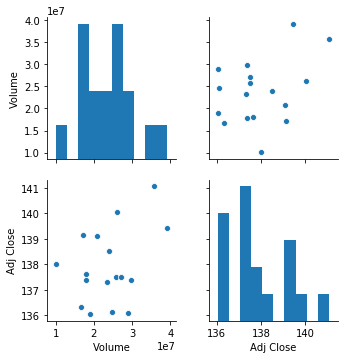

In [139]:
import seaborn as sns
sns.pairplot(df)


In [140]:
type(t_out)

list

In [0]:
plot_data = pd.DataFrame(np.array(t_out).reshape(90,))
stocks = pd.DataFrame(np.array(stock_dataset).reshape(stock_dataset.size,))

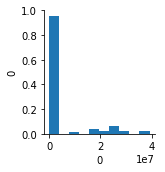

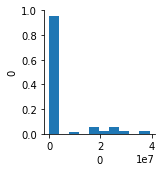

In [152]:

sns.pairplot(plot_data)
sns.pairplot(stocks)

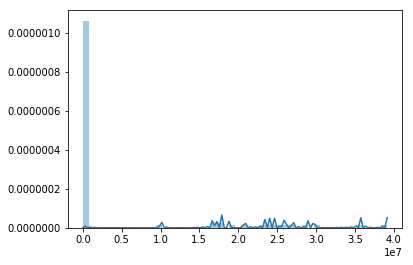

In [153]:
sns.distplot(stocks)


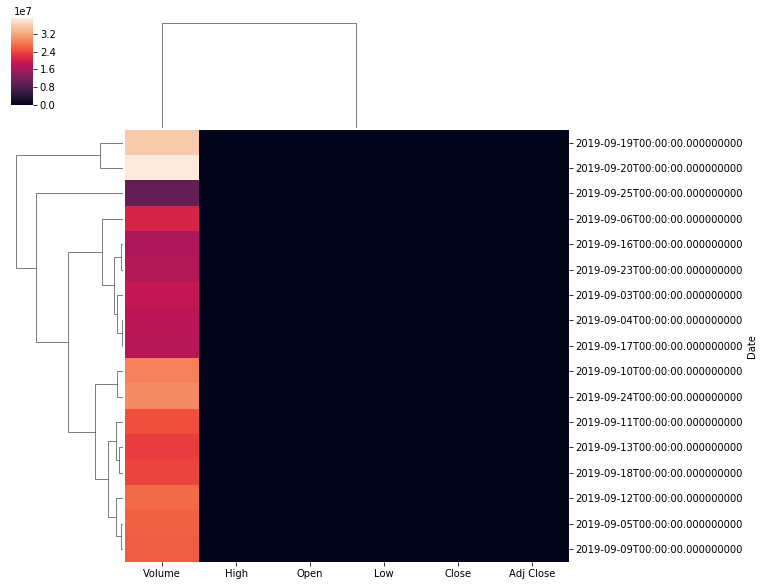

In [155]:
sns.clustermap(stock_dataset)